In [2]:
!python --version

Python 3.13.7


In [17]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.nn.functional import max_pool2d, avg_pool2d

In [23]:
image = torch.FloatTensor(np.array(np.unstack(np.array(Image.open(r"C:/Users/Anoban/Downloads/Root_Images/Adzuki_bean/79.tiff")), axis=-1)))
image.shape

torch.Size([4, 6156, 4414])

In [24]:
image # damn 4 channels huh???

tensor([[[ 49.,  55.,  53.,  ..., 255., 255., 255.],
         [ 59.,  61.,  62.,  ..., 255., 255., 255.],
         [ 73.,  76.,  79.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]],

        [[ 49.,  55.,  53.,  ..., 255., 255., 255.],
         [ 59.,  61.,  62.,  ..., 255., 255., 255.],
         [ 73.,  76.,  79.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]],

        [[ 49.,  55.,  53.,  ..., 255., 255., 255.],
         [ 59.,  61.,  62.,  ..., 255., 255., 255.],
         [ 73.,  76.,  79.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]],

In [27]:
pooled = avg_pool2d(image, kernel_size=(4, 4))
pooled.shape

torch.Size([4, 1539, 1103])

In [58]:
pooled.mean(dim=-3).type(torch.uint8).apply_(lambda _: 0 if _ < 125.0 else 1)

tensor([[0, 1, 0,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.uint8)

In [40]:
# np.linspace(start=0, stop=1538, num=150, endpoint=False, dtype=np.int32)

array([   0,   10,   20,   30,   41,   51,   61,   71,   82,   92,  102,
        112,  123,  133,  143,  153,  164,  174,  184,  194,  205,  215,
        225,  235,  246,  256,  266,  276,  287,  297,  307,  317,  328,
        338,  348,  358,  369,  379,  389,  399,  410,  420,  430,  440,
        451,  461,  471,  481,  492,  502,  512,  522,  533,  543,  553,
        563,  574,  584,  594,  604,  615,  625,  635,  645,  656,  666,
        676,  686,  697,  707,  717,  727,  738,  748,  758,  769,  779,
        789,  799,  810,  820,  830,  840,  851,  861,  871,  881,  892,
        902,  912,  922,  933,  943,  953,  963,  974,  984,  994, 1004,
       1015, 1025, 1035, 1045, 1056, 1066, 1076, 1086, 1097, 1107, 1117,
       1127, 1138, 1148, 1158, 1168, 1179, 1189, 1199, 1209, 1220, 1230,
       1240, 1250, 1261, 1271, 1281, 1291, 1302, 1312, 1322, 1332, 1343,
       1353, 1363, 1373, 1384, 1394, 1404, 1414, 1425, 1435, 1445, 1455,
       1466, 1476, 1486, 1496, 1507, 1517, 1527], d

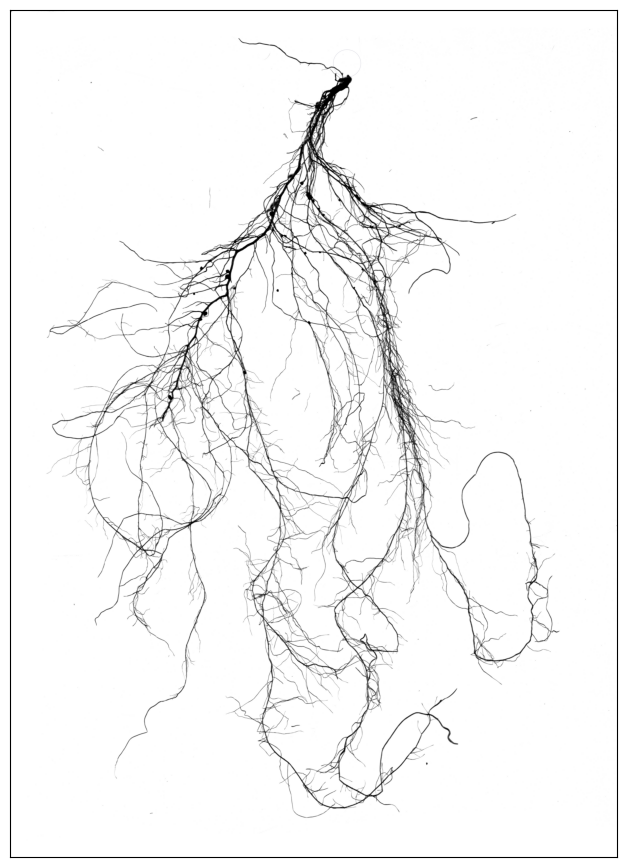

In [43]:
fig, axes = plt.subplots()
fig.set_size_inches(15, 11)

# axes.imshow(np.stack(pooled.type(torch.uint8), axis=2))
axes.imshow(np.stack(image.type(torch.uint8), axis=2))
# let's have 150 tiles along the y axis and 110 tiles along the x axes
# for x in 

axes.set_xticks([])
axes.set_yticks([])
plt.show()